In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mousedata_df = pd.read_csv(mouse_data)
mousedata_df.head()
#mousedata_df


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
cd_df = pd.read_csv(clinical_data)
cd_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [59]:
# Combine the data into a single dataset

#result = pd.concat([mousedata_df, cd_df], axis=1, join='inner')
result = cd_df.merge(mousedata_df, on="Mouse ID", how = 'inner')


# Display the data table for preview

result.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [251]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

result_tpd = result.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
result_tpd

# Convert to DataFrame

tpd_df = pd.DataFrame(result_tpd) 

# # Preview DataFrame
# tvrange = tpd_df['Tumor Volume (mm3)'].tolist()
# tvrange

tpd_df.head()
#Means of Tutor
#val_tpd = tpd_df.values
#val_tpd

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [215]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tpd_df_sem = result.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
tpd_df_sem
# Convert to DataFrame

sem_df = pd.DataFrame(tpd_df_sem) 

# # Preview DataFrame

# Preview DataFrame


sem_df_ = pd.pivot_table(sem_df, 
                          index=['Timepoint'], 
                          columns=['Drug']) 

# Preview that Reformatting worked
#sem_df_


semlist = sem_df_.loc[ : , 'Tumor Volume (mm3)']
#semlist

Capomulin_sem = semlist[["Capomulin"]]
Capomulin_list_sem = Capomulin_sem ['Capomulin'].tolist()

Infubinol_sem = semlist[["Infubinol"]]
Infubinol_list_sem = Infubinol_sem['Infubinol'].tolist()

Ketapril_sem = semlist[["Ketapril"]]
Ketapril_list_sem = Ketapril_sem['Ketapril'].tolist()

Placebo_sem = semlist[["Placebo"]]
Placebo_list_sem = Placebo_sem['Placebo'].tolist()

#Placebo_list_sem

In [44]:
# Minor Data Munging to Re-Format the Data Frames
tpd_mung = pd.pivot_table(result, 
                          index=['Timepoint'], 
                          columns=['Drug']) 
#tpd_mung
# Preview that Reformatting worked
xx = tpd_mung.loc[ : , 'Tumor Volume (mm3)']
xx

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [252]:
Capomulin = xx[["Capomulin"]]
Capomulin_list = Capomulin['Capomulin'].tolist()

Infubinol = xx[["Infubinol"]]
Infubinol_list = Infubinol['Infubinol'].tolist()

Ketapril = xx[["Ketapril"]]
Ketapril_list = Ketapril['Ketapril'].tolist()

Placebo = xx[["Placebo"]]
Placebo_list = Placebo['Placebo'].tolist()

# dictionary = dict(zip(Capomulin_list, Capomulin_list_sem))
# dictionary

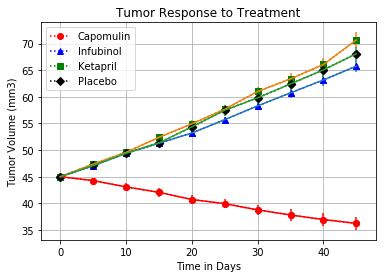

In [54]:
# Generate the Plot (with Error Bars)

# The maximum x value for our chart will be 100
x_limit = 50

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 5)

# Create a random array of data that we will use for our y values
plt.scatter(x_axis, Capomulin_list, marker='o', color='red')
plt.plot(x_axis, Capomulin_list, 'r:o', label='Capomulin')
plt.errorbar(x_axis, Capomulin_list, yerr=Capomulin_list_sem, color='red')

plt.scatter(x_axis, Infubinol_list, marker='^', color='blue')
plt.plot(x_axis, Infubinol_list, 'b:^', label='Infubinol')
plt.errorbar(x_axis, Infubinol_list, yerr=Infubinol_list_sem)

plt.scatter(x_axis, Ketapril_list, marker='s', color='green')
plt.plot(x_axis, Ketapril_list, 'g:s', label='Ketapril')
plt.errorbar(x_axis, Ketapril_list, yerr=Ketapril_list_sem)

plt.scatter(x_axis, Placebo_list, marker='D', color='black')
plt.plot(x_axis, Placebo_list, 'k:D', label='Placebo')
plt.errorbar(x_axis, Placebo_list, yerr=Placebo_list_sem)

plt.xlabel('Time in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')

# Save the Figure
plt.savefig('Tumor Response to Treatment.jpg')

# Show the Figure
plt.grid()
plt.legend()
plt.show()


## Metastatic Response to Treatment

In [246]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metamean = result.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
metamean




Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
           25           0.818182
           30           1.090909
           35           1.181818
           40           1.380952
           45           1.476190
Ceftamin   0            0.000000
           5            0.380952
           10           0.600000
           15           0.789474
           20           1.111111
           25           1.500000
           30           1.937500
           35           2.071429
           40           2.357143
           45           2.692308
Infubinol  0            0.000000
           5            0.280000
           10           0.666667
           15           0.904762
           20           1.050000
           25           1.277778
           30           1.588235
           35           1.666667
           40           2.100000
           45         

In [247]:
# Convert to DataFrame

meta_df = pd.DataFrame(metamean) 
meta_df
# Preview DataFrame

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [248]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

meta_sem = result.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
meta_sem
# Convert to DataFrame

meta_semd = pd.DataFrame(meta_sem) 

# Preview DataFrame


meta_semdf = pd.pivot_table(meta_semd, 
                          index=['Timepoint'], 
                          columns=['Drug']) 
meta_semdfp = meta_semdf.loc[ : , 'Metastatic Sites']
#meta_semdfp


In [ ]:
##To list Sems

# Capomulin_msem = meta_semdfp[["Capomulin"]]
# Capomulin_list_msem = Capomulin_msem ['Capomulin'].tolist()
# Capomulin_list_msem
# Infubinol_msem = meta_semdfp[["Infubinol"]]
# Infubinol_list_msem = Infubinol_msem['Infubinol'].tolist()

# Ketapril_msem = meta_semdfp[["Ketapril"]]
# Ketapril_list_msem = Ketapril_msem['Ketapril'].tolist()

Placebo_msem = meta_semdfp[["Placebo"]]
Placebo_list_msem = Placebo_msem['Placebo'].tolist()

Placebo_list_msem

In [212]:
# Minor Data Munging to Re-Format the Data Frames

meta_mung = pd.pivot_table(result, 
                          index=['Timepoint'], 
                          columns=['Drug']) 

# Preview that Reformatting worked
mungsites = tpd_mung.loc[ : , 'Metastatic Sites']
mungsites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [233]:
Capomulin_m = mungsites[["Capomulin"]]
Capomulin_list_m = Capomulin_m['Capomulin'].tolist()

Infubinol_m = mungsites[["Infubinol"]]
Infubinol_list_m = Infubinol_m['Infubinol'].tolist()

Ketapril_m = mungsites[["Ketapril"]]
Ketapril_list_m = Ketapril_m['Ketapril'].tolist()

Placebo_m = mungsites[["Placebo"]]
Placebo_list_m = Placebo_m['Placebo'].tolist()
#Placebo_list_m

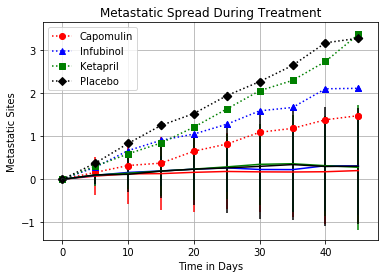

In [253]:
# Generate the Plot (with Error Bars)

x_limit = 50

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 5)

# Create a random array of data that we will use for our y values
plt.scatter(x_axis, Capomulin_list_m, marker='o', color='red')
plt.plot(x_axis, Capomulin_list_m, 'r:o', label='Capomulin')
plt.errorbar(x_axis, Capomulin_list_msem, yerr=Capomulin_list_sem, color='red')

plt.scatter(x_axis, Infubinol_list_m, marker='^', color='blue')
plt.plot(x_axis, Infubinol_list_m, 'b:^', label='Infubinol')
plt.errorbar(x_axis, Infubinol_list_msem, yerr=Infubinol_list_sem, color='blue')

plt.scatter(x_axis, Ketapril_list_m, marker='s', color='green')
plt.plot(x_axis, Ketapril_list_m, 'g:s', label='Ketapril')
plt.errorbar(x_axis, Ketapril_list_msem, yerr=Ketapril_list_sem, color='green')

plt.scatter(x_axis, Placebo_list_m, marker='D', color='black')
plt.plot(x_axis, Placebo_list_m, 'k:D', label='Placebo')
plt.errorbar(x_axis, Placebo_list_msem, yerr=Placebo_list_sem, color='black')

#for some reason I couldn't get the errorbars to print properly

plt.xlabel('Time in Days')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')

# Save the Figure
plt.savefig('Metastatic Spread During Treatment.jpg')

# Show the Figure
plt.grid()
plt.legend()
plt.show()


## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

count = result.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
count

# Convert to DataFrame
mouse_df = pd.DataFrame(count)

# Preview DataFrame
mouse_df

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18
          25               18
          30               16
          35               14
          40               14
          45               13
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
...                       ...
Ramicane  0                25
          5                25
          10               24
          15               24
          20               23
          25               23
          30               23
          35               21
          40               20
          45               20
Stelasyn  0                26
          5                25
          10               23
          15               23
          20               21
          25               19
          30               18
          35               16
          40               12
          45               11
Zoniferol 0                25
          5                24
          10               22
          15               21
          20               17
          25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [22]:
# Minor Data Munging to Re-Format the Data Frames
micemung = pd.pivot_table(mouse_df, index=["Timepoint"], columns=['Drug'])

# Preview the Data Frame
mice_mung = micemung.loc[ : , 'Mouse ID']
mice_mung



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [23]:
Capomulin_mm = mice_mung[["Capomulin"]]
Capomulin_list_mm = Capomulin_mm['Capomulin'].tolist()

Infubinol_mm = mice_mung[["Infubinol"]]
Infubinol_list_mm = Infubinol_mm['Infubinol'].tolist()

Ketapril_mm = mice_mung[["Ketapril"]]
Ketapril_list_mm = Ketapril_mm['Ketapril'].tolist()

Placebo_mm = mice_mung[["Placebo"]]
Placebo_list_mm = Placebo_mm['Placebo'].tolist()
Placebo_list_mm

[25, 24, 24, 20, 19, 17, 15, 14, 12, 11]

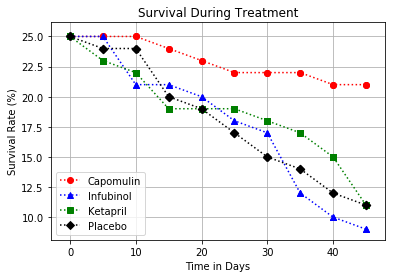

In [57]:
# Generate the Plot (Accounting for percentages)

x_limit = 50
x_axis = np.arange(0, x_limit, 5)

plt.scatter(x_axis, Capomulin_list_mm, marker='o', color='red')
plt.plot(x_axis, Capomulin_list_mm, 'r:o', label='Capomulin')


plt.scatter(x_axis, Infubinol_list_mm, marker='^', color='blue')
plt.plot(x_axis, Infubinol_list_mm, 'b:^', label='Infubinol')


plt.scatter(x_axis, Ketapril_list_mm, marker='s', color='green')
plt.plot(x_axis, Ketapril_list_mm, 'g:s', label='Ketapril')


plt.scatter(x_axis, Placebo_list_mm, marker='D', color='black')
plt.plot(x_axis, Placebo_list_mm, 'k:D', label='Placebo')



plt.title("Survival During Treatment")
plt.xlabel('Time in Days')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend()

# Save the Figure
plt.savefig('Survival During Treatment.jpg')

# Show the Figure
plt.show()

## Summary Bar Graph

In [196]:
# Calculate the percent changes for each drug
#drugs4pc = tpd_df.loc[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
newtpd = tpd_df.loc[ : , 'Tumor Volume (mm3)']
#newtpd
#print(newtpd[('Capomulin'), ('Timepoint')].iloc[-1])

pc_Capomulin = ((newtpd.loc['Capomulin'][45] - newtpd.loc['Capomulin'][0]) / newtpd.loc['Capomulin'][0]) * 100
pc_Capomulin = round(pc_Capomulin, 2)

pc_Ceftamin = ((newtpd.loc['Ceftamin'][45] - newtpd.loc['Ceftamin'][0]) / newtpd.loc['Ceftamin'][0]) * 100
pc_Ceftamin = round(pc_Ceftamin, 2)

pc_Infubinol = ((newtpd.loc['Infubinol'][45] - newtpd.loc['Infubinol'][0]) / newtpd.loc['Infubinol'][0]) * 100
pc_Infubinol = round(pc_Infubinol, 2)

pc_Ketapril = ((newtpd.loc['Ketapril'][45] - newtpd.loc['Ketapril'][0]) / newtpd.loc['Ketapril'][0]) * 100
pc_Ketapril = round(pc_Ketapril, 2)

pc_Naftisol = ((newtpd.loc['Naftisol'][45] - newtpd.loc['Naftisol'][0]) / newtpd.loc['Naftisol'][0]) * 100
pc_Naftisol = round(pc_Naftisol, 2)

pc_Placebo = ((newtpd.loc['Placebo'][45] - newtpd.loc['Placebo'][0]) / newtpd.loc['Placebo'][0]) * 100
pc_Placebo = round(pc_Placebo, 2)

pc_Propriva = ((newtpd.loc['Propriva'][45] - newtpd.loc['Propriva'][0]) / newtpd.loc['Propriva'][0]) * 100
pc_Propriva = round(pc_Propriva, 2)

pc_Ramicane = ((newtpd.loc['Ramicane'][45] - newtpd.loc['Ramicane'][0]) / newtpd.loc['Ramicane'][0]) * 100
pc_Ramicane = round(pc_Ramicane, 2)

pc_Stelasyn = ((newtpd.loc['Stelasyn'][45] - newtpd.loc['Stelasyn'][0]) / newtpd.loc['Stelasyn'][0]) * 100
pc_Stelasyn = round(pc_Stelasyn, 2)

pc_Zoniferol = ((newtpd.loc['Zoniferol'][45] - newtpd.loc['Zoniferol'][0]) / newtpd.loc['Zoniferol'][0]) * 100
pc_Zoniferol = round(pc_Zoniferol, 2)

l = [pc_Capomulin, pc_Ceftamin, 
                      pc_Infubinol, pc_Ketapril, 
                      pc_Naftisol, pc_Placebo, 
                      pc_Propriva, pc_Ramicane,
                     pc_Stelasyn, pc_Zoniferol]

percentchange_list = list(map("{}%".format, l))

Drugz = ['Capomulin', 'Ceftamin',
            'Infubinol',  'Ketapril',
            'Naftisol', 'Placebo',
            'Propriva', 'Ramicane',
            'Stelasyn', 'Zoniferol']

pcdf = pd.DataFrame(percentchange_list, columns = ['Percent Change',], index=Drugz)


# Display the data to confirm
pcdf

,Percent Change
Capomulin,-19.48%
Ceftamin,42.52%
Infubinol,46.12%
Ketapril,57.03%
Naftisol,53.92%
Placebo,51.3%
Propriva,47.24%
Ramicane,-22.32%
Stelasyn,52.09%
Zoniferol,46.58%


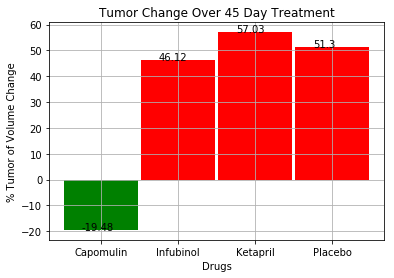

In [205]:
# Store all Relevant Percent Changes into a Tuple
toople = (pc_Capomulin, pc_Infubinol, pc_Ketapril, pc_Placebo)

# x = np.arange(-20, 60, 20)
bars = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


height = toople
y = np.arange(len(bars))
width = 1/1.05
plt.bar(y, height, width, color=['green', 'red', 'red', 'red'])
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel('Drugs')
plt.xticks(y, bars)
plt.ylabel('% Tumor of Volume Change')

for a,b in zip(y, height):
    plt.text(a - 0.25, b, str(b))




# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.jpg")

# Show the Figure
fig.show()


In [ ]:
# Observation 1: Capomulin performs the best out of the 4 samples because there is tumor reduction. 
# Observation 2: The Placebo drug is as ineffective as Infubinol and Ketapril 
# Observation 3: Ketapril 